In [1]:
import csv
import pandas as pd
import math
import numpy as np
from scipy import stats
# Use svg backend for better quality
import matplotlib
# AUTOLAB_IGNORE_START
matplotlib.use("svg")
# AUTOLAB_IGNORE_STOP
import matplotlib.pyplot as plt
# AUTOLAB_IGNORE_START
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0) # you should adjust this to fit your screen
# AUTOLAB_IGNORE_STOP

In [2]:
df = pd.read_csv("table.csv")
df = df.drop(['Hrs Per Week 5', 'Hrs Per Week 8'], axis=1)
df = df[pd.notnull(df['Num'])]
temp = []
for item in df["Num"]:
    temp.append(item.replace("-",""))
df["Num"] = temp
df = df[df.Num.apply(lambda x: x.isnumeric())]
df["Num"] = df["Num"].astype("int64")
df = df[df["Possible Respondents"] > 10]
df = df[df["Response Rate %"] > 20]

print(df.dtypes)
print(df.head())
print(df.isnull().any())
# print(df.loc[:, df.isna().any()])
print(df.shape)

Year                                                     int64
Semester                                                object
Dept                                                    object
Num                                                      int64
Section                                                 object
Name                                                    object
Course Name                                             object
Level                                                   object
Possible Respondents                                     int64
Num Respondents                                          int64
Response Rate %                                        float64
Hrs Per Week                                           float64
Interest in student learning                           float64
Clearly explain course requirements                    float64
Clear learning objectives & goals                      float64
Instructor provides feedback to students to improve    

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class 'int'>
<class

slope: 0.9858702164801676
intercept: -0.18773759339096507
r_value: 0.8337821446846334
p_value: 0.0
std_error: 0.010052592143918827


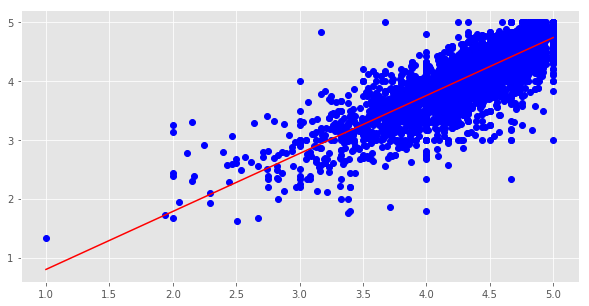

In [3]:
def plot_against_overall(category, df, dept=None, course_level=None, overall_category="Overall course rate"):
    """
    Inputs: category (string), category of interest in the dataframe
            df (pandas.dataframe), dataframe
            dept (string), major department
            course_level (int), 100,200,300... level of difficulty
            overall_category (string), overall course rate or overall teaching rate
    
    Output: matplotlib graph of category vs overall
            returns nothing
    """
    given = []
    overall = []
    if dept != None:
        df = df[df["Dept"]==dept]
    if course_level != None:
        level = course_level//100
        for item in df['Num']:
            if not str(type(item)) == "<class 'numpy.int64'>":
                print(str(type(item)))
        df = df[(df['Num']//100)%10 == level]
    for i,row in df.iterrows():
        item = row[category]
        total = row[overall_category]
        if pd.notnull(item) and pd.notnull(total):
            given.append(item)
            overall.append(total)
    x = given
    y = overall
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print("slope:", slope)
    print("intercept:", intercept)
    print("r_value:", r_value)
    print("p_value:", p_value)
    print("std_error:", std_err)
    mn=np.min(x)
    mx=np.max(x)
    x1=np.linspace(mn,mx,500)
    y1=slope*x1+intercept
    plt.plot(x,y,'ob')
    plt.plot(x1,y1,'-r')
    return 
    
p = plot_against_overall("Interest in student learning", df, None, 100)
plt.show()

## Comparing Categories Against Overall Satisfaction

slope: 1.02415043842
intercept: -0.332878129072
r_value: 0.838977271386
p_value: 0.0
std_error: 0.00450231697244


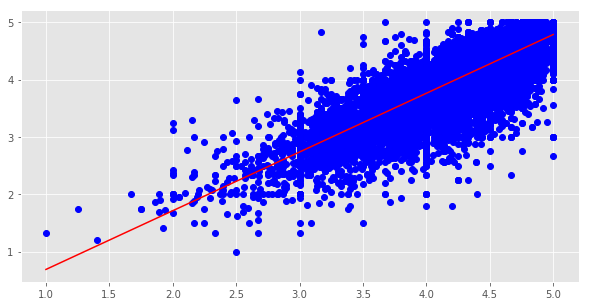

In [4]:
plot_against_overall(category = 'Interest in student learning', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.887237146452
intercept: 0.405734935161
r_value: 0.842295436396
p_value: 0.0
std_error: 0.00384828982929


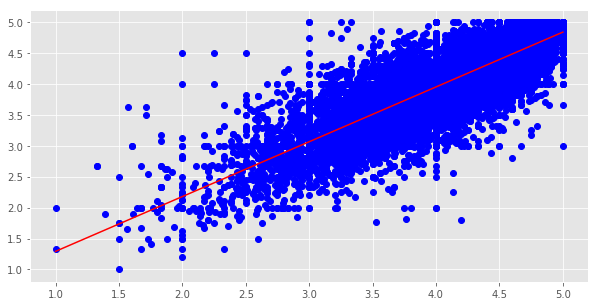

In [5]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.887237146452
intercept: 0.405734935161
r_value: 0.842295436396
p_value: 0.0
std_error: 0.00384828982929


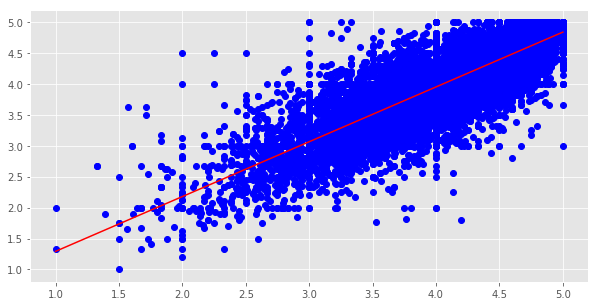

In [6]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.962528125178
intercept: 0.0581044198429
r_value: 0.874883170899
p_value: 0.0
std_error: 0.00361159523687


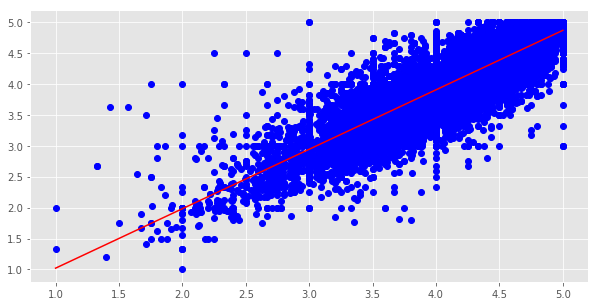

In [7]:
plot_against_overall(category = 'Clear learning objectives & goals', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.962528125178
intercept: 0.0581044198429
r_value: 0.874883170899
p_value: 0.0
std_error: 0.00361159523687


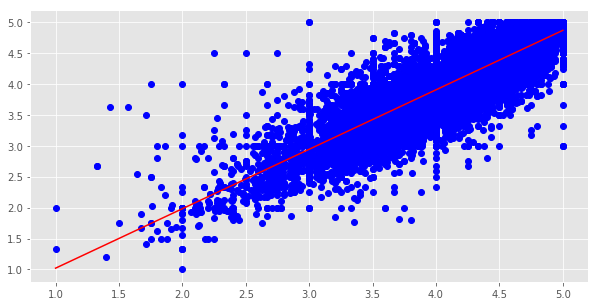

In [8]:
plot_against_overall(category = 'Clear learning objectives & goals', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.822232647217
intercept: 0.773080624027
r_value: 0.83474576281
p_value: 0.0
std_error: 0.00367616907798


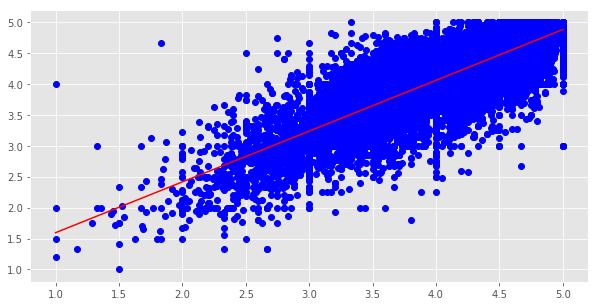

In [9]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 1.05631367319
intercept: -0.431116446599
r_value: 0.872509191619
p_value: 0.0
std_error: 0.00400926758539


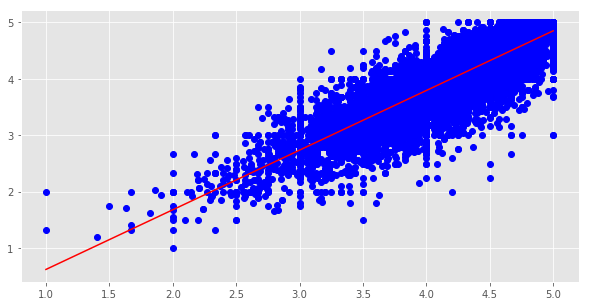

In [10]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.949555970103
intercept: 0.110961368973
r_value: 0.898340449022
p_value: 0.0
std_error: 0.00314725182308


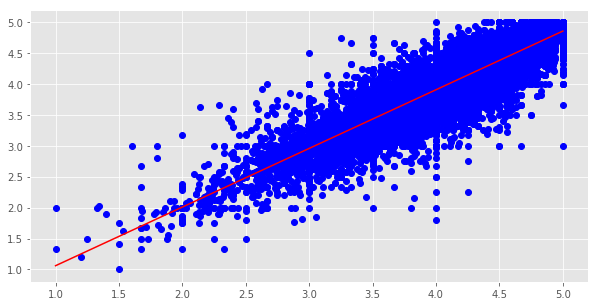

In [11]:
plot_against_overall(category = 'Explains subject matter of course', df = df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.922599668521
intercept: -0.0181018650327
r_value: 0.709477298997
p_value: 0.0
std_error: 0.00621136758694


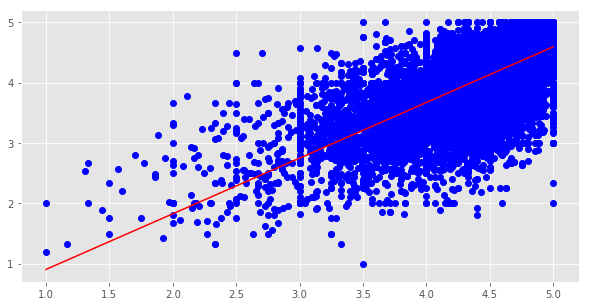

In [12]:
plot_against_overall(category = 'Show respect for all students', df = df, dept=None, course_level=None, overall_category="Overall course rate")

The category with the weakest correlation to overall course rate is 'show respect for all students'

slope: 1.07739437371
intercept: -0.490140050783
r_value: 0.889108910571
p_value: 0.0
std_error: 0.00375921595477


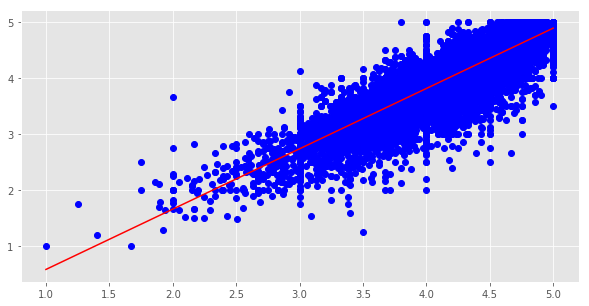

In [13]:
plot_against_overall(category = 'Interest in student learning', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.904126918654
intercept: 0.410181753367
r_value: 0.864659290178
p_value: 0.0
std_error: 0.00356040226498


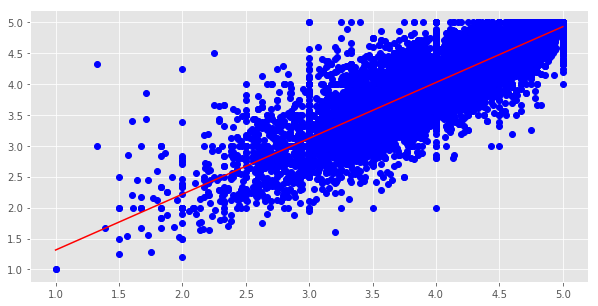

In [14]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.904126918654
intercept: 0.410181753367
r_value: 0.864659290178
p_value: 0.0
std_error: 0.00356040226498


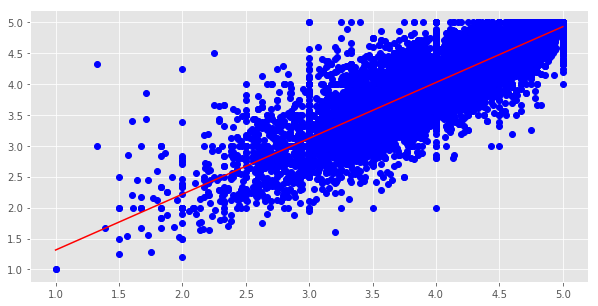

In [15]:
plot_against_overall(category = 'Clearly explain course requirements', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.976816581783
intercept: 0.0730773085044
r_value: 0.894417784308
p_value: 0.0
std_error: 0.0033105989695


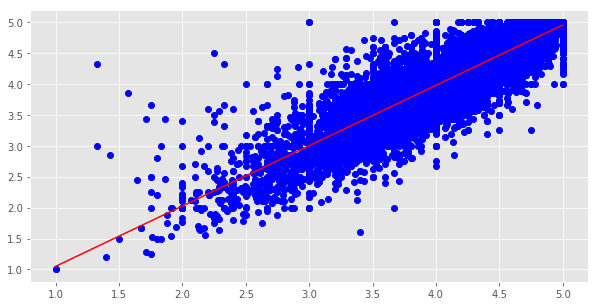

In [16]:
plot_against_overall(category = 'Clear learning objectives & goals', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.852072266711
intercept: 0.726293889148
r_value: 0.871412557059
p_value: 0.0
std_error: 0.00325115277053


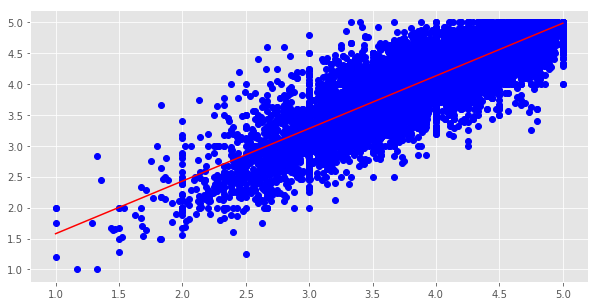

In [17]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 1.06467384706
intercept: -0.391674260899
r_value: 0.885901632035
p_value: 0.0
std_error: 0.0037786009556


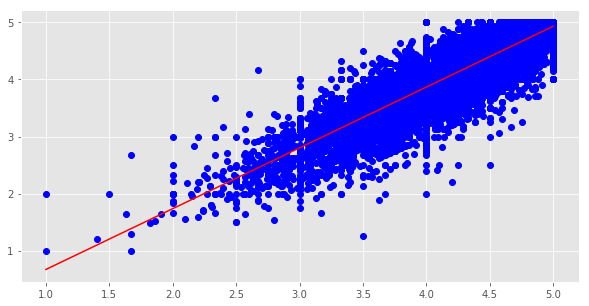

In [18]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

slope: 0.98353195544
intercept: 0.0422034315417
r_value: 0.937349043846
p_value: 0.0
std_error: 0.00247773943876


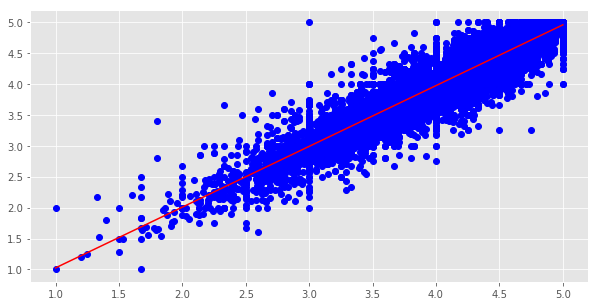

In [19]:
plot_against_overall(category = 'Explains subject matter of course', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

In [20]:
plot_against_overall(category = 'Show respect for all students', df = df, dept=None, course_level=None, overall_category="Overall teaching rate")

KeyboardInterrupt: 

Once again, shows respect for students is the weakest correlated. 

## By Department

In [4]:
all_departments = list(set(df['Dept']))
len(all_departments)

60

There are 60 unique departments at CMU. We're interested in knowing for which departments are FCE scores the highest and lowest. 

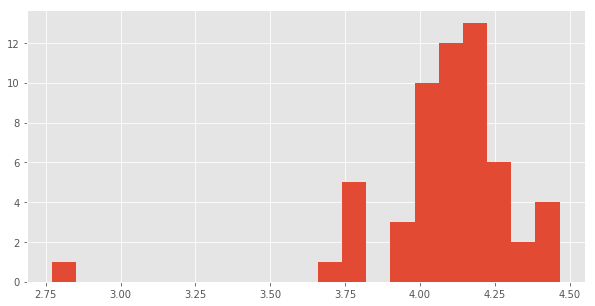

In [5]:
course_rate_by_dept = []
depts = []
for dept in all_departments:
    subset = df[df['Dept'] == dept]
    if subset.shape[0] < 5: 
        continue
    avg_course_rate = subset['Overall course rate'].mean()
    course_rate_by_dept.append(avg_course_rate)
    depts.append(dept)
course_rate_by_dept = np.array(course_rate_by_dept)
plt.hist(course_rate_by_dept, bins='auto')
plt.show()

In [6]:
lowest = np.array(depts)[course_rate_by_dept <= np.percentile(course_rate_by_dept, 10)]
lowest

array(['CIT', 'WC', 'CRM', 'MCS', 'ECO', 'IS'], dtype='<U3')

3.756934404283802


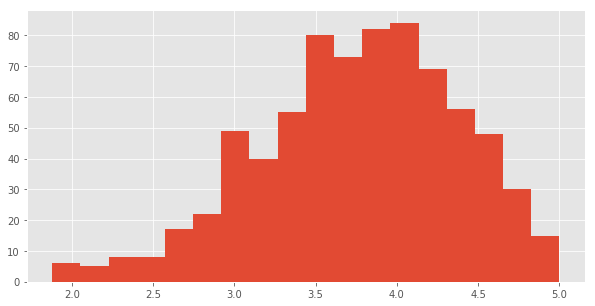

In [7]:
lowest_df = df[df['Dept'].isin(lowest)]
print(lowest_df['Overall course rate'].mean())
plt.hist(lowest_df['Overall course rate'], bins='auto')
plt.show()

3.8864524765729587


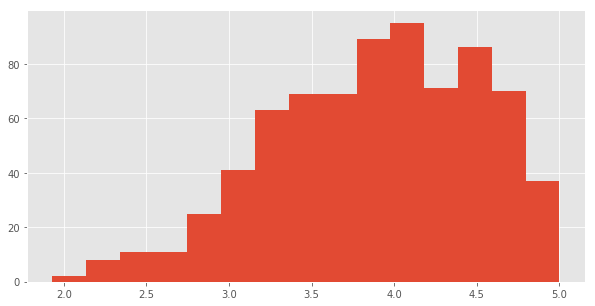

In [8]:
print(lowest_df['Overall teaching rate'].mean())
plt.hist(lowest_df['Overall teaching rate'], bins='auto')
plt.show()

In [9]:
highest = np.array(depts)[course_rate_by_dept >= np.percentile(course_rate_by_dept, 90)]
highest #all graduate departments!

array(['ML', 'ETC', 'ICT', 'IA', 'HIS', 'ISR'], dtype='<U3')

4.393021978021978


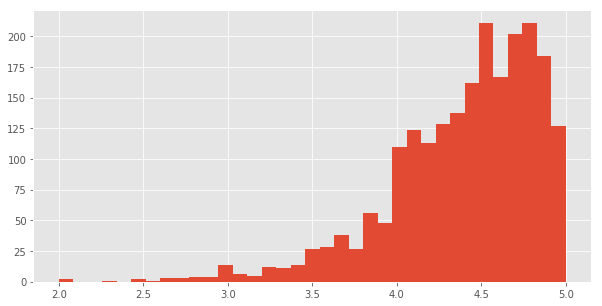

In [10]:
highest_df = df[df['Dept'].isin(highest)]
print(highest_df['Overall course rate'].mean())
plt.hist(highest_df['Overall course rate'], bins='auto')
plt.show()

4.473411172161172


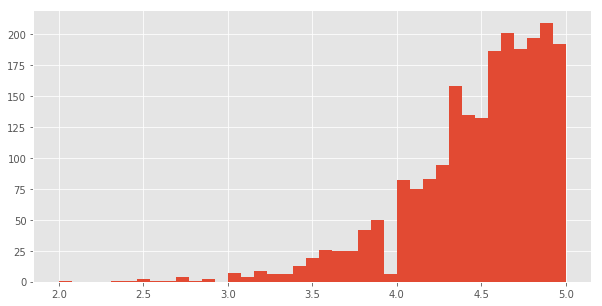

In [11]:
highest_df = df[df['Dept'].isin(highest)]
print(highest_df['Overall teaching rate'].mean())
plt.hist(highest_df['Overall teaching rate'], bins='auto')
plt.show()

slope: 0.8940475919683782
intercept: 0.10483747318313785
r_value: 0.830536935422132
p_value: 1.2839747575869266e-167
std_error: 0.023498382483499974


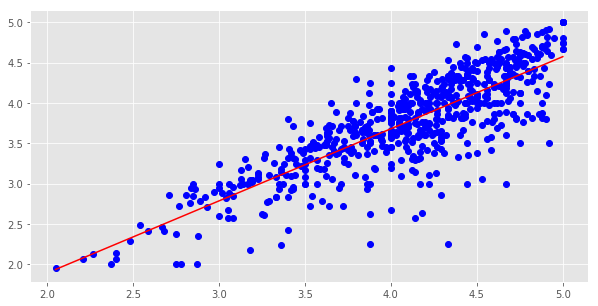

In [12]:
plot_against_overall(category = 'Interest in student learning', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

slope: 0.9403795036723627
intercept: 0.030322980657130127
r_value: 0.863020426949993
p_value: 3.13353066868511e-195
std_error: 0.021573881937186828


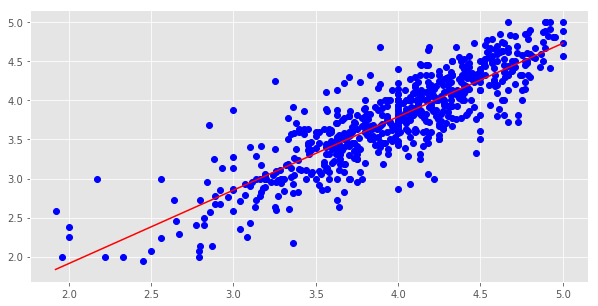

In [13]:
plot_against_overall(category = 'Clearly explain course requirements', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Clear learning objectives & goals', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Explains subject matter of course', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Show respect for all students', df = lowest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Interest in student learning', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Clearly explain course requirements', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Clear learning objectives & goals', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Instructor provides feedback to students to improve', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Demonstrate importance of subject matter', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Explains subject matter of course', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

In [ ]:
plot_against_overall(category = 'Show respect for all students', df = highest_df, dept=None, course_level=None, overall_category="Overall course rate")

## Adjustment by Levels (RIP Aviicii)

In [14]:
lvl100 = df[list(map(lambda x: str(x)[-3] == '1', df['Num']))]
lvl200 = df[list(map(lambda x: str(x)[-3] == '2', df['Num']))]
lvl300 = df[list(map(lambda x: str(x)[-3] == '3', df['Num']))]
lvl400 = df[list(map(lambda x: str(x)[-3] == '4', df['Num']))]
lvl500 = df[list(map(lambda x: str(x)[-3] == '5', df['Num']))]
lvl600 = df[list(map(lambda x: str(x)[-3] == '6', df['Num']))]
lvl700 = df[list(map(lambda x: str(x)[-3] == '7', df['Num']))]
lvl800 = df[list(map(lambda x: str(x)[-3] == '8', df['Num']))]
lvl900 = df[list(map(lambda x: str(x)[-3] == '9', df['Num']))]

4.113427230046947


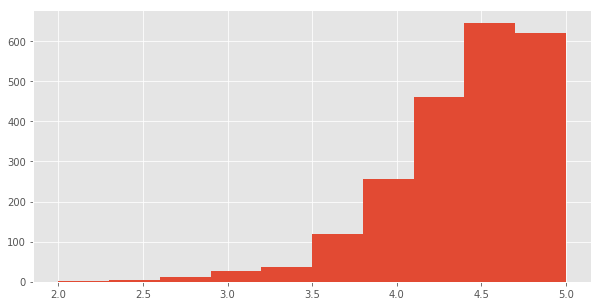

In [15]:
print(lvl100['Overall course rate'].mean())
plt.hist(highest_df['Overall course rate'], bins=10)
plt.show()

4.082226890756302


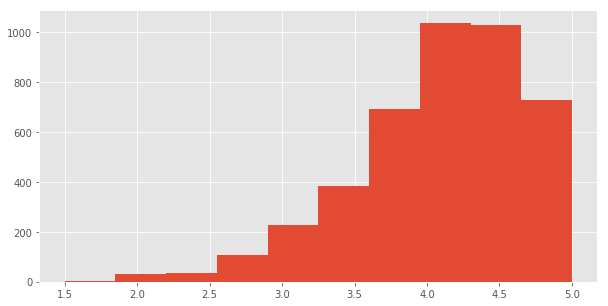

In [16]:
print(lvl200['Overall course rate'].mean())
plt.hist(lvl200['Overall course rate'][~np.isnan(lvl200['Overall course rate'])], bins = 10)
plt.show()

4.101535422702133


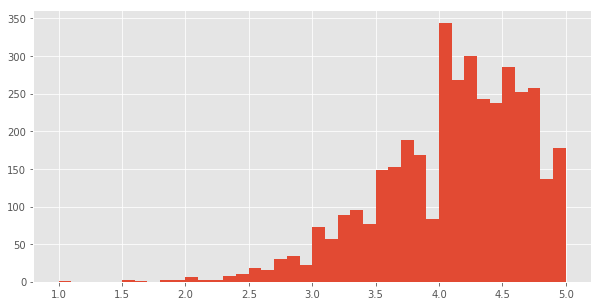

In [17]:
print(lvl300['Overall course rate'].mean())
plt.hist(lvl300['Overall course rate'][~np.isnan(lvl300['Overall course rate'])], bins='auto')
plt.show()

4.052660256410257


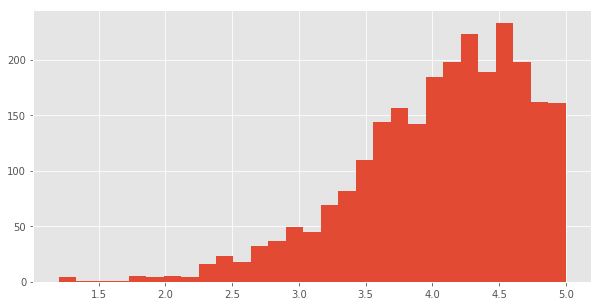

In [18]:
print(lvl400['Overall course rate'].mean())
plt.hist(lvl400['Overall course rate'][~np.isnan(lvl400['Overall course rate'])], bins='auto')
plt.show()

4.203267326732673


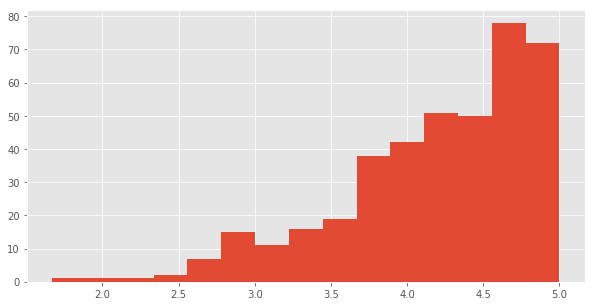

In [19]:
print(lvl500['Overall course rate'].mean())
plt.hist(lvl500['Overall course rate'][~np.isnan(lvl500['Overall course rate'])], bins='auto')
plt.show()

4.1567009867009865


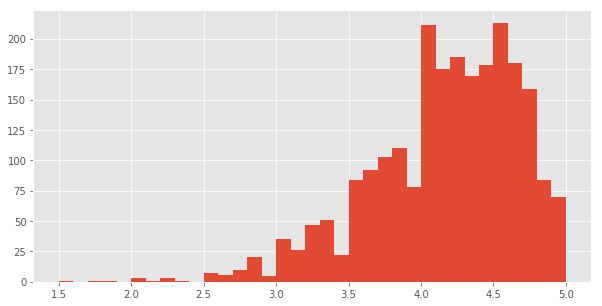

In [20]:
print(lvl600['Overall course rate'].mean())
plt.hist(lvl600['Overall course rate'][~np.isnan(lvl600['Overall course rate'])], bins='auto')
plt.show()

4.176415753903519


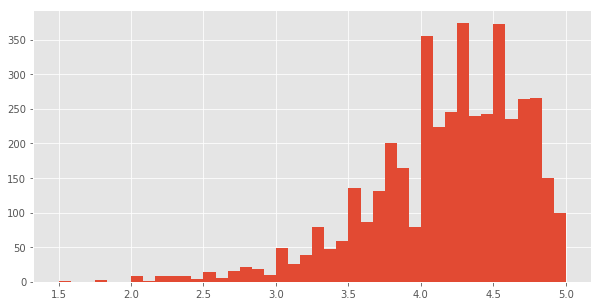

In [21]:
print(lvl700['Overall course rate'].mean())
plt.hist(lvl700['Overall course rate'][~np.isnan(lvl700['Overall course rate'])], bins='auto')
plt.show()

4.208110709987967


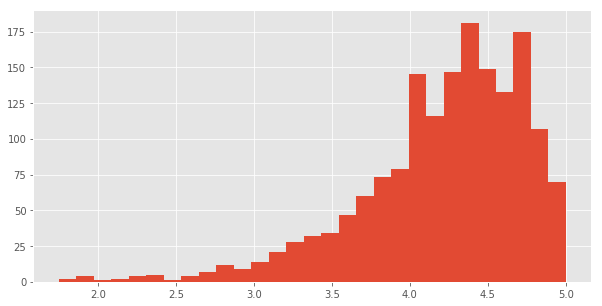

In [22]:
print(lvl800['Overall course rate'].mean())
plt.hist(lvl800['Overall course rate'][~np.isnan(lvl800['Overall course rate'])], bins='auto')
plt.show()

4.358501872659176


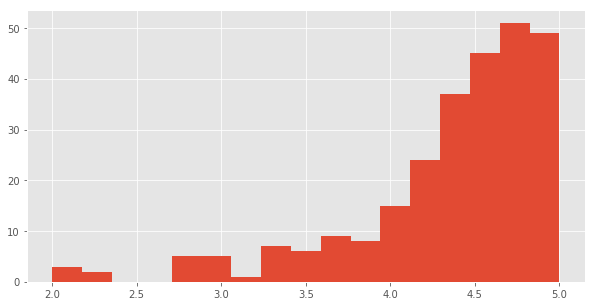

In [23]:
print(lvl900['Overall course rate'].mean())
plt.hist(lvl900['Overall course rate'][~np.isnan(lvl900['Overall course rate'])], bins='auto')
plt.show()

In [24]:
levels = np.array(list(range(100, 1000, 100)))
course_rate_values = np.array([lvl100['Overall course rate'].mean(), lvl200['Overall course rate'].mean(), lvl300['Overall course rate'].mean(), lvl400['Overall course rate'].mean(), lvl500['Overall course rate'].mean(), lvl600['Overall course rate'].mean(), lvl700['Overall course rate'].mean(), lvl800['Overall course rate'].mean(), lvl900['Overall course rate'].mean()])
teaching_rate_values = np.array([lvl100['Overall teaching rate'].mean(), lvl200['Overall teaching rate'].mean(), lvl300['Overall teaching rate'].mean(), lvl400['Overall teaching rate'].mean(), lvl500['Overall teaching rate'].mean(), lvl600['Overall teaching rate'].mean(), lvl700['Overall teaching rate'].mean(), lvl800['Overall teaching rate'].mean(), lvl900['Overall teaching rate'].mean()])

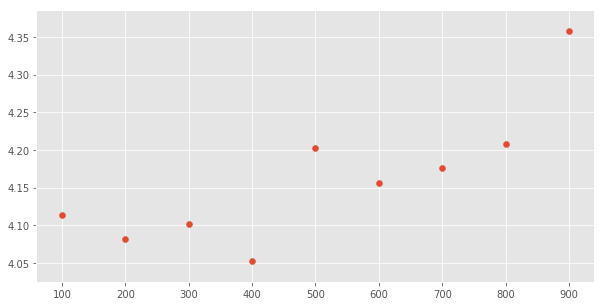

In [25]:
plt.scatter(levels, course_rate_values)
plt.show()

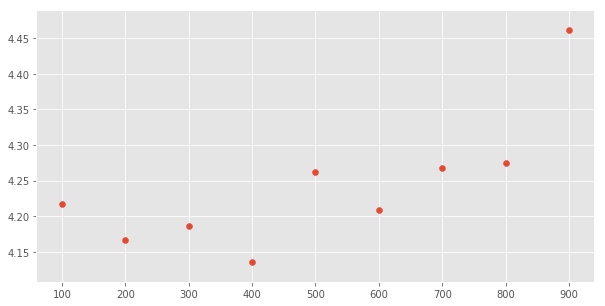

In [26]:
plt.scatter(levels, teaching_rate_values)
plt.show()

In [31]:
df.head()

,Year,Semester,Dept,Num,Section,Name,Course Name,Level,Possible Respondents,Num Respondents,...,Interest in student learning,Clearly explain course requirements,Clear learning objectives & goals,Instructor provides feedback to students to improve,Demonstrate importance of subject matter,Explains subject matter of course,Show respect for all students,Overall teaching rate,Overall course rate,Academic Semester
1,2018,Spring,ARC,48733,A3,"KARAGUZEL, OMER",ENV PERF SIM,Graduate,12,9,...,4.56,4.67,4.67,4.44,4.89,4.67,4.89,4.67,4.44,Spring 2018
2,2018,Spring,ART,60131,C3,"BINGHAM, ROBERT",3D MEDIA STUDIO II,Undergraduate,14,4,...,5.00,3.50,4.00,5.00,4.50,4.50,5.00,4.75,4.50,Spring 2018
3,2018,Spring,ART,60131,D3,"GURYSH, STEVEN",3D MEDIA STUDIO II,Undergraduate,13,3,...,5.00,5.00,5.00,4.67,5.00,4.67,5.00,5.00,4.67,Spring 2018
4,2018,Spring,ART,60131,A3,"SCARPONE, PHILLIP",3D MEDIA STUDIO II,Undergraduate,12,5,...,4.80,4.80,4.80,4.80,4.80,5.00,4.60,4.80,4.80,Spring 2018
11,2018,Spring,CHE,6462,A3,"GOUNARIS, CHRYSANTHOS",OPTM MDG & ALGRTHMS,Undergraduate,86,23,...,4.57,4.22,4.35,3.91,4.30,4.13,4.57,4.22,4.04,Spring 2018


In [48]:
import sqlite3
df['Academic Semester'] = df["Semester"].map(str) + ' ' + df["Year"].map(str)
experience_df = df.drop(labels = ['Year', 'Semester', 'Academic Semester'], axis = 1)
experience_df = experience_df.groupby(['Num', 'Name']).agg(['mean', 'count', 'first', 'last'])
experience_df

Possible Respondents                   \
                                            mean count first last   
Num   Name                                                          
2201  KINGSFORD, CARLETON              17.000000     1    17   17   
2223  KIM, SE YOUNG                    17.500000     2    11   24   
2250  ILYIN, VALENTIN                  23.000000     1    23   23   
      MURPHY, ROBERT                   13.666667     3    14   16   
      SCHWARTZ, RUSSELL                13.666667     3    14   16   
2252  MURPHY, ROBERT                   11.000000     1    11   11   
2261  KANGAS, JOSHUA                   11.000000     1    11   11   
      THICKMAN, KAREN                  21.000000     1    21   21   
2601  COMPEAU, PHILLIP                 24.333333     3    26   24   
      KINGSFORD, CARLETON              39.000000     1    39   39   
2602  COMPEAU, PHILLIP                 26.000000     1    26   26   
      SUBRAMANIAN, SHOBA               20.000000     2    26   14   
      THICKMAN, KAREN                  14.000000     1    14   14   
2604  COMPEAU, PHILLIP                 30.000000     1    30   30   
2613  KINGSFORD, CARLETON              63.500000     2    69   58   
      MA, JIAN                         35.000000     2    28   42   
2651  VU, DU (JOHN)                    30.000000     6    27   17   
2652  NAIK, ARMAGHAN                   28.000000     1    28   28   
      THICKMAN, KAREN                  23.000000     1    23   23   
      VU, DU (JOHN)                    17.500000     2    14   21   
2654  VU, DU (JOHN)                    26.800000     5    32   16   
2710  BAR-JOSEPH, ZIV                  13.666667     3    15   15   
      KIM, SE YOUNG                    30.000000     1    30   30   
      MA, JIAN                         31.000000     1    31   31   
2711  DURAND, M                        14.000000     3    15   12   
2712  SCHWARTZ, RUSSELL                16.000000     5    17   11   
2713  KINGSFORD, CARLETON              67.000000     2    76   58   
2717  BAR-JOSEPH, ZIV                  12.000000     1    12   12   
2718  LANGMEAD, CHRISTOPHER            12.000000     1    12   12   
      WU, WEI                          12.000000     1    12   12   
...                                          ...   ...   ...  ...   
99275 MANKE, KODY                      19.000000     3    18   18   
99333 NAIR, INDIRA                     44.000000     1    44   44   
99334 NAIR, INDIRA                     36.000000     1    36   36   
99339 NAIR, INDIRA                     15.000000     1    15   15   
99340 NAIR, INDIRA                     18.000000     1    18   18   
99352 FINGER, SUSAN                    11.000000     1    11   11   
      LIU, Jennifer                    11.000000     1    11   11   
      ROBINSON, OLIVIA                 17.000000     1    17   17   
99353 FINGER, SUSAN                    22.000000     3    29   21   
      KNOPF, JAMES                     16.000000     1    16   16   
      TOURETZKY, DAVID                 17.000000     1    17   17   
99355 ZACHARIAS, ROBERT                12.400000     5    13   13   
      ZEGLIN, GARTH                    12.666667     3    14   11   
99358 CORBETT, THOMAS                  12.000000     1    12   12   
      DYAR, HUGH                       14.000000     1    14   14   
99359 LARSON, ELIZABETH                13.000000     2    11   15   
99405 CHEEK, ALEXANDER                 19.000000     1    19   19   
      PATTERSON, GARY                  19.000000     1    19   19   
      helenz, Vincent                  16.500000     2    17   16   
99410 LIMAM MANSAR, SELMA              16.000000     1    16   16   
99451 CARVALHO, SARAH                  11.000000     1    11   11   
      COSTELLO, CARA                   14.500000     2    15   14   
99452 HEIDISH, PEGGY                   13.363636    11    11   12   
99461 HALLINEN, JUDITH                 13.000000     1    13   13   
99522 MADSEN, PETER       

2.8012769353551477


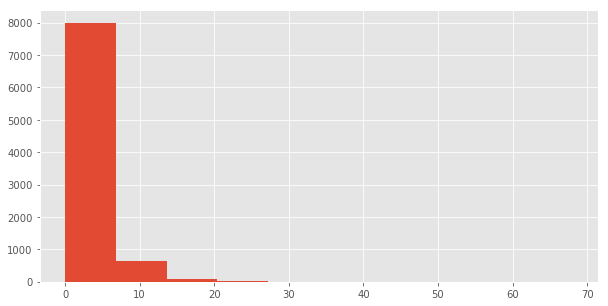

In [44]:
plt.hist(experience_df['Overall course rate']['count'])
print(experience_df['Overall course rate']['count'].mean())
plt.show()

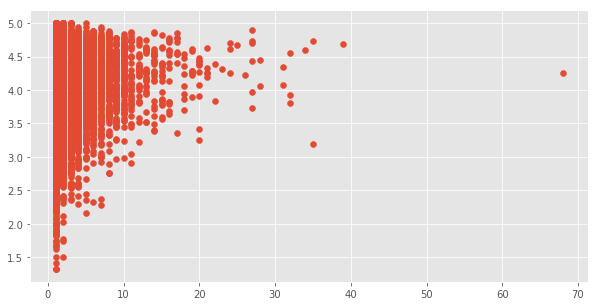

In [45]:
plt.scatter(experience_df['Overall course rate']['count'],experience_df['Overall course rate']['mean'] )

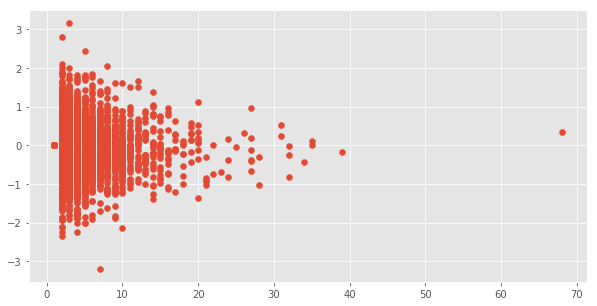

In [46]:
plt.scatter(experience_df['Overall course rate']['count'],experience_df['Overall course rate']['last'] - experience_df['Overall course rate']['first'] )

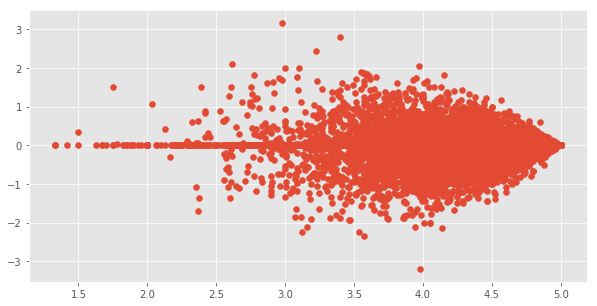

In [47]:
plt.scatter(experience_df['Overall course rate']['mean'],experience_df['Overall course rate']['last'] - experience_df['Overall course rate']['first'] )

In [55]:
experience_df['Experience'] = experience_df['Possible Respondents']['count']
experience_df
by_years = experience_df.groupby(['Experience']).agg(['mean', 'count'])
by_years

Possible Respondents                                      \
                           mean       count             first         
                           mean count  mean count        mean count   
Experience                                                            
1                     24.954444  4039     1  4039   24.954444  4039   
2                     28.696796  1654     2  1654   29.356711  1654   
3                     29.866177   954     3   954   30.908805   954   
4                     36.677308   650     4   650   38.875385   650   
5                     31.670118   425     5   425   32.776471   425   
6                     37.800123   271     6   271   39.084871   271   
7                     35.402798   194     7   194   36.494845   194   
8                     36.040268   149     8   149   36.738255   149   
9                     40.539548   118     9   118   42.110169   118   
10                    45.281818    88    10    88   45.784091    88   
11                    35.138340    46    11    46   35.456522    46   
12                    55.283333    30    12    30   55.733333    30   
13                    36.295385    25    13    25   38.400000    25   
14                    35.230769    26    14    26   34.461538    26   
15                    35.943333    20    15    20   31.800000    20   
16                    35.871094    16    16    16   34.375000    16   
17                    46.045752     9    17     9   51.666667     9   
18                    34.562500     8    18     8   35.000000     8   
19                    45.414474     8    19     8   43.250000     8   
20                    45.100000    10    20    10   48.200000    10   
21                    60.685714     5    21     5   58.200000     5   
22                    18.204545     2    22     2   18.500000     2   
23                   135.043478     1    23     1  199.000000     1   
24                    28.902778     3    24     3   34.666667     3   
25                    15.320000     1    25     1   15.000000     1   
26                    26.461538     1    26     1   36.000000     1   
27                    23.697531     6    27     6   29.833333     6   
28                    60.089286     2    28     2   91.000000     2   
31                    40.887097     2    31     2   25.000000     2   
32                    35.822917     3    32     3   54.333333     3   
34                    35.235294     1    34     1   40.000000     1   
35                    18.414286     2    35     2   16.500000     2   
39                    21.615385     1    39     1   19.000000     1   
68                    14.029412     1    68     1   15.000000     1   

                             Num Respondents        ...   \
                  last                  mean        ...    
                  mean count            mean count  ...    
Experience                                          ...    
1            24.954444  4039       14.235702  4039  ...    
2            28.036880  1654       16.967352  1654  ...    
3            28.977987   954       17.900769   954  ...    
4            35.283077   650       21.454231   650  ...    
5            30.550588   425       18.898824   425  ...    
6            36.033210   271       22.198647   271  ...    
7            34.644330   194       21.359352   194  ...    
8            34.939597   149       21.402685   149  ...    
9            36.889831   118       24.087571   118  ...    
10           43.568182    88       25.305682    88  ...    
11           32.673913    46       20.711462    46  ...    
12           57.100000    30       32.025000    30  ...    
13           40.080000    25       21.492308    25  ...    
14           37.500000    26       22.714286    26  ...    
15           37.450000    20       19.293333    20  ...    
16           35.937500    16       19.914062    16  ...    
17           49.000000     9       33.666667     9  ...    
18           27.750000     8       18.986111     8  

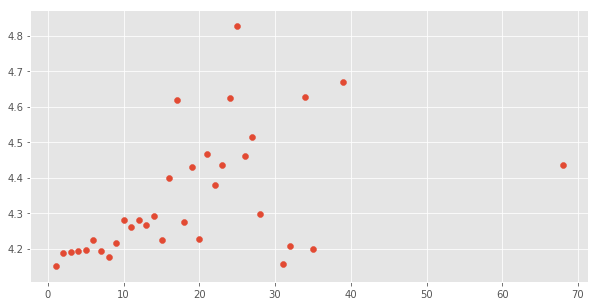

In [57]:
plt.scatter(by_years.index, by_years['Overall teaching rate']['mean']['mean'])